<h1><font color='#004b87'>Question 1</font></h1>
<h3>Occupations</h3>
<p>Step 1. Import the necessary libraries</p>
<p>Step 2. Import the dataset from this address.</p>
<p>Step 3. Assign it to a variable called users</p>
<p>Step 4. Discover what is the mean age per occupation</p>
<p>Step 5. Discover the Male ratio per occupation and sort it from the most to the least</p>
<p>Step 6. For each occupation, calculate the minimum and maximum ages</p>
<p>Step 7. For each combination of occupation and sex, calculate the mean age</p>
<p>Step 8. For each occupation present the percentage of women and men</p>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

In [3]:
mean_age_per_occupation = users.groupby('occupation').age.mean().rename('Mean Age')
print("Mean Age Per Occupation:\n")
print(mean_age_per_occupation.to_frame())

Mean Age Per Occupation:

                Mean Age
occupation              
administrator  38.746835
artist         31.392857
doctor         43.571429
educator       42.010526
engineer       36.388060
entertainment  29.222222
executive      38.718750
healthcare     41.562500
homemaker      32.571429
lawyer         36.750000
librarian      40.000000
marketing      37.615385
none           26.555556
other          34.523810
programmer     33.121212
retired        63.071429
salesman       35.666667
scientist      35.548387
student        22.081633
technician     33.148148
writer         36.311111


In [4]:
users['is_male'] = users.gender.apply(lambda x: 1 if x == 'M' else 0)
male_ratio_per_occupation = users.groupby('occupation').is_male.mean().sort_values(ascending=False)
print("Male Ratio Per Occupation (sorted):\n")
print(male_ratio_per_occupation.to_frame('Male Ratio'))

Male Ratio Per Occupation (sorted):

               Male Ratio
occupation               
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857


In [5]:
min_max_age_per_occupation = users.groupby('occupation').age.agg(['min', 'max'])
print("Min and Max Age Per Occupation:\n")
print(min_max_age_per_occupation)

Min and Max Age Per Occupation:

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [6]:
mean_age_per_occupation_and_sex = users.groupby(['occupation', 'gender']).age.mean().rename('Mean Age')
print("Mean Age Per Occupation and Sex:\n")
print(mean_age_per_occupation_and_sex.to_frame())

Mean Age Per Occupation and Sex:

                       Mean Age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
      

In [7]:
gender_counts_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_percentage_per_occupation = gender_counts_per_occupation.div(gender_counts_per_occupation.sum(axis=1), axis=0) * 100

print("Percentage of Women and Men Per Occupation:\n")
print(gender_percentage_per_occupation)

Percentage of Women and Men Per Occupation:

gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor          0.000000  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


<h1><font color='#004b87'>Question 2</font></h1>
<h3>Euro Teams</h3>
<p>Step 1. Import the necessary libraries</p>
<p>Step 2. Import the dataset from this address</p>
<p>Step 3. Assign it to a variable called euro12</p>
<p>Step 4. Select only the Goal column</p>
<p>Step 5. How many team participated in the Euro2012?</p>
<p>Step 6. What is the number of columns in the dataset?</p>
<p>Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline</p>
<p>Step 8. Sort the teams by Red Cards, then to Yellow Cards</p>
<p>Step 9. Calculate the mean Yellow Cards given per Team</p>
<p>Step 10. Filter teams that scored more than 6 goals</p>
<p>Step 11. Select the teams that start with G</p>
<p>Step 12. Select the first 7 columns</p>
<p>Step 13. Select all columns except the last 3</p>
<p>Step 14. Present only the Shooting Accuracy from England, Italy and Russia</p>

In [8]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)
goals = euro12['Goals']

In [9]:
num_teams = euro12['Team'].nunique()
print("Number of team participated in the Euro2012:", num_teams)

Number of team participated in the Euro2012: 16


In [10]:
num_columns = euro12.shape[1]
print("Number of columns in the dataset:", num_columns)

Number of columns in the dataset: 35


In [11]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [12]:
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print(discipline_sorted)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [13]:
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:", mean_yellow_cards)

Mean Yellow Cards given per Team: 7.4375


In [14]:
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print("Teams that scored more than 6 goals:\n", teams_more_than_6_goals['Team'].to_string(index=False))

Teams that scored more than 6 goals:
 Germany
  Spain


In [15]:
teams_start_with_g = euro12[euro12['Team'].str.startswith('G')]
print("Teams that start with G:\n", teams_start_with_g['Team'].to_string(index=False))

Teams that start with G:
 Germany
 Greece


In [16]:
#Referred: https://www.geeksforgeeks.org/how-to-get-first-column-of-pandas-dataframe/
first_7_columns = euro12.T.head(7).T
print("First 7 columns:\n", first_7_columns.to_string(index=False))

First 7 columns:
                Team Goals Shots on target Shots off target Shooting Accuracy % Goals-to-shots Total shots (inc. Blocked)
            Croatia     4              13               12             51.9%            16.0%                         32
     Czech Republic     4              13               18             41.9%            12.9%                         39
            Denmark     4              10               10             50.0%            20.0%                         27
            England     5              11               18             50.0%            17.2%                         40
             France     3              22               24             37.9%             6.5%                         65
            Germany    10              32               32             47.8%            15.6%                         80
             Greece     5               8               18             30.7%            19.2%                         32
              

In [17]:
all_but_last_3_columns = euro12.iloc[:,:-3]
print("All columns except last 3:\n", all_but_last_3_columns.to_string(index=False))

All columns except last 3:
                Team  Goals  Shots on target  Shots off target Shooting Accuracy % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  Penalties not scored  Headed goals  Passes  Passes completed Passing Accuracy  Touches  Crosses  Dribbles  Corners Taken  Tackles  Clearances  Interceptions  Clearances off line  Clean Sheets  Blocks  Goals conceded  Saves made Saves-to-shots ratio  Fouls Won  Fouls Conceded  Offsides  Yellow Cards  Red Cards
            Croatia      4               13                12             51.9%            16.0%                          32             0              0                     0             2    1076               828            76.9%     1706       60        42             14       49          83             56                  NaN             0      10               3          13                81.3%         41              62         2             9          0
     Czech Republic      4              

In [18]:
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print("Shooting Accuracy from England, Italy and Russia:\n", shooting_accuracy.to_string(index=False))

Shooting Accuracy from England, Italy and Russia:
    Team Shooting Accuracy
England             50.0%
  Italy             43.0%
 Russia             22.5%


<h1><font color='#004b87'>Question 3</font></h1>
<h3>Housing</h3>
<p>Step 1. Import the necessary libraries</p>
<p>Step 2. Create 3 differents Series, each of length 100, as follows:</p>
<ul>
  <li>The first a random number from 1 to 4</li>
  <li>The second a random number from 1 to 3</li>
  <li>The third a random number from 10,000 to 30,000</li>
</ul>
<p>Step 3. Create a DataFrame by joining the Series by column</p>
<p>Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter</p>
<p>Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'</p>
<p>Step 6. Ops it seems it is going only until index 99. Is it true?</p>
<p>Step 7. Reindex the DataFrame so it goes from 0 to 299</p>

In [19]:
import numpy as np

In [20]:
s1 = pd.Series(np.random.randint(1, 5, 100))  # Random numbers from 1 to 4
s2 = pd.Series(np.random.randint(1, 4, 100))  # Random numbers from 1 to 3
s3 = pd.Series(np.random.randint(10000, 30001, 100))  # Random numbers from 10,000 to 30,000

df = pd.DataFrame({'bedrs': s1, 'bathrs': s2, 'price_sqr_meter': s3})

bigcolumn = pd.DataFrame(df.values.flatten(), columns=['bigcolumn'])

print(bigcolumn)

     bigcolumn
0            3
1            1
2        23209
3            4
4            2
..         ...
295          3
296      14885
297          1
298          3
299      18757

[300 rows x 1 columns]


In [21]:
bigcolumn.index = range(len(bigcolumn))
print(bigcolumn)

     bigcolumn
0            3
1            1
2        23209
3            4
4            2
..         ...
295          3
296      14885
297          1
298          3
299      18757

[300 rows x 1 columns]


<h1><font color='#004b87'>Question 4</font></h1>

In [22]:
file_path = '.\wind.txt'
wind_data = pd.read_csv(file_path, delimiter='\s+', skiprows=1)
print(wind_data.head())

   61  1  1.1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83  \
0  61  1    2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1  61  1    3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2  61  1    4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
3  61  1    5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   
4  61  1    6  13.21   8.12   9.96   6.67   5.37  4.50  10.67   4.42   7.17   

   12.58  18.50  15.04.1  
0   9.67  17.54    13.83  
1   7.67  12.75    12.71  
2   5.88   5.46    10.88  
3  10.34  12.92    11.83  
4   7.50   8.12    13.17  


In [23]:
# Assign column names
column_names = ["Yr", "Mo", "Dy", "RPT", "VAL", "ROS", "KIL", "SHA", "BIR", "DUB", "CLA", "MUL", "CLO", "BEL", "MAL"]
# Assign it to a variable called 'data'
data = wind_data.copy()
# Add column names
data.columns = column_names
# Combine the first three columns into a single datetime index
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
print(data.head())

              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
DateTime                                                                   
2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   
2061-01-06  13.21   8.12   9.96   6.67   5.37  4.50  10.67   4.42   7.17   

              CLO    BEL    MAL  
DateTime                         
2061-01-02   9.67  17.54  13.83  
2061-01-03   7.67  12.75  12.71  
2061-01-04   5.88   5.46  10.88  
2061-01-05  10.34  12.92  11.83  
2061-01-06   7.50   8.12  13.17  


In [24]:
data = wind_data.copy() 
# Add column names
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Function to fix the year
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
print(data.head())

              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
DateTime                                                                   
2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   
2061-01-06  13.21   8.12   9.96   6.67   5.37  4.50  10.67   4.42   7.17   

              CLO    BEL    MAL  
DateTime                         
2061-01-02   9.67  17.54  13.83  
2061-01-03   7.67  12.75  12.71  
2061-01-04   5.88   5.46  10.88  
2061-01-05  10.34  12.92  11.83  
2061-01-06   7.50   8.12  13.17  


In [25]:
data = wind_data.copy() 
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Function to fix the year
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
print(data.head())

              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
DateTime                                                                   
2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   
2061-01-06  13.21   8.12   9.96   6.67   5.37  4.50  10.67   4.42   7.17   

              CLO    BEL    MAL  
DateTime                         
2061-01-02   9.67  17.54  13.83  
2061-01-03   7.67  12.75  12.71  
2061-01-04   5.88   5.46  10.88  
2061-01-05  10.34  12.92  11.83  
2061-01-06   7.50   8.12  13.17  


In [26]:
data.index = pd.to_datetime(data.index)
missing_values = data.isnull().sum()
print("Number of missing values for each location:")
print(missing_values)

Number of missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    1
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [27]:
data.index = pd.to_datetime(data.index)
missing_values = data.isnull().sum()
print("Number of missing values for each location:")
print(missing_values)

Number of missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    1
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [28]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Function to fix the year
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000

data['Yr'] = data['Yr'].apply(fix_year)

# Setting  the 'DateTime' column as index
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)

# Counting the total number of non-missing values in the dataset
total_non_missing = data.count().sum()
print("Total number of non-missing values in the dataset:", total_non_missing)

Total number of non-missing values in the dataset: 78846


In [29]:
data = wind_data.copy() 
data.columns = column_names

# Combine the first three columns into a single datetime index
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Function to fix the year
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000

# Apply the fix_year function to the 'Yr' column
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
# Calculating the windspeeds over all locations and times
mean_windspeed = data.mean().mean()
print("Mean windspeed over all locations and times:", mean_windspeed)

Mean windspeed over all locations and times: 10.22759021606677


In [30]:
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6567.000000,6570.000000,6571.000000,6568.000000,6572.000000,6573.000000,6570.000000,6571.000000,6570.000000,6572.000000,6573.000000,6569.000000
mean,12.362580,10.643658,11.660297,6.306014,10.455834,7.091832,9.796753,8.494786,8.493234,8.706742,13.120189,15.599164
std,5.618744,5.267488,5.008796,3.605898,4.936125,3.968837,4.977704,4.499739,4.167090,4.504044,5.835104,6.700300
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [31]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)

# Calculating min, max, mean, and standard deviations of windspeeds at each day
day_stats = pd.DataFrame({
    'Min': data.min(axis=1),
    'Max': data.max(axis=1),
    'Mean': data.mean(axis=1),
    'Std': data.std(axis=1)
})
print(day_stats)

             Min    Max       Mean       Std
DateTime                                    
2061-01-02  6.50  17.54  11.336364  3.188994
2061-01-03  6.17  18.50  11.641818  3.681912
2061-01-04  1.79  11.75   6.619167  3.198126
2061-01-05  6.17  13.33  10.630000  2.445356
2061-01-06  4.42  13.21   8.240000  2.998063
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6573 rows x 4 columns]


In [32]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Function to fix the year
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
# Calculate average windspeed in January for each location
january_avg = data[data.index.month == 1].mean()
print(january_avg)

RPT    14.846978
VAL    12.910881
ROS    13.299856
KIL     7.195745
SHA    11.667734
BIR     8.051580
DUB    11.816032
CLA     9.510719
MUL     9.540898
CLO    10.049031
BEL    14.543429
MAL    18.034129
dtype: float64


In [33]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
yearly_data = data.resample('Y').mean()
print(yearly_data.head())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
DateTime                                                                     
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329  6.097151   
1972-12-31  12.463962  10.561311  12.058333  5.929699   9.430410  6.358825   
1973-12-31  11.828466  10.680493  10.680493  5.547863   9.640877  6.548740   

                 DUB       CLA       MUL       CLO        BEL        MAL  
DateTime                                                                  
1969-12-31  8.564493  7.711397  7.924521  7.754384  12.621233  15.762904  
1970-12-31  9.609890  8.334630  9.297616  8.289808  13.183644  16.456027  
1971-12-31  8.385890  6.757315  7.915370  7.229753  12.208932  15.025233  
1972-12-31  9.704508  7.680792  8.357295  7.515273  12.727377  15.028716  
197

In [34]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
monthly_data = data.resample('M').mean()
print(monthly_data.head())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
DateTime                                                                     
1969-01-31  12.824839  12.113871  11.403871  6.708710  10.557097  5.926452   
1969-02-28  13.504643  10.426786  14.240714  7.326786  11.314643  5.482857   
1969-03-31  10.398710   8.533226  12.277419  6.125161   9.618065  4.942581   
1969-04-30  12.591333   9.769333  10.828000  6.937333  11.304667  5.578000   
1969-05-31   9.419032   7.941935   9.298387  5.137097   8.618710  5.391935   

                  DUB       CLA       MUL       CLO        BEL        MAL  
DateTime                                                                   
1969-01-31   9.882903  8.375161  8.378065  9.515484  13.410000  16.957742  
1969-02-28  10.983929  8.747143  8.994286  9.081071  14.334643  19.786786  
1969-03-31   9.193226  8.503226  8.376129  7.800968  10.394194  16.420000  
1969-04-30   9.383333  8.141667  9.201333  8.370333  11.905667  14.124000

In [35]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
weekly_data = data.resample('W').mean()
print(weekly_data.head())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
DateTime                                                                     
1969-01-05   5.884000   3.958000   6.758000  2.752000   5.416000  2.392000   
1969-01-12  14.708571  12.521429  15.135714  6.851429  11.940000  6.744286   
1969-01-19  15.030000  16.452857  10.778571  7.774286  12.590000  6.821429   
1969-01-26  14.438571  14.267143  13.017143  7.721429  10.607143  7.114286   
1969-02-02  13.510000  11.917143  10.702857  8.111429  11.581429  5.612857   

                  DUB        CLA        MUL        CLO        BEL        MAL  
DateTime                                                                      
1969-01-05   8.626000   4.388000   5.640000   7.160000  11.510000  16.108000  
1969-01-12  10.591429   9.174286   9.107143  10.124286  12.130000  20.385714  
1969-01-19   9.998571   8.815714   9.078571   8.385714  13.624286  14.248571  
1969-01-26   8.537143  10.030000   7.720000  10.720000  15

In [36]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
data = data.sort_index()
weekly_data = data.loc['1961-01-02':].resample('W-Mon').agg(['min', 'max', 'mean', 'std']).head(52)
print(weekly_data.head())

             RPT                                VAL                    \
             min    max       mean       std    min    max       mean   
DateTime                                                                
1969-01-06  2.62  14.25   7.278333  4.319673   0.54  11.12   5.151667   
1969-01-13  4.50  22.34  13.315714  6.710583   1.50  18.50  11.147143   
1969-01-20  9.59  25.08  16.975714  5.149232  13.29  25.17  18.554286   
1969-01-27  4.00  20.54  14.462857  6.008355   5.13  20.25  13.892857   
1969-02-03  5.21  18.58  12.457143  4.694119   3.96  19.79  11.380000   

                       ROS         ...        CLO              BEL         \
                 std   min    max  ...       mean       std    min    max   
DateTime                           ...                                      
1969-01-06  4.252131  5.41  19.50  ...   7.453333  2.224650   6.08  16.08   
1969-01-13  7.108260  4.63  20.91  ...   9.457143  4.016195   2.62  18.84   
1969-01-20  4.536860  5.58  19

<h1><font color='#004b87'>Question 5</font></h1>
<p>Step 1. Import the necessary libraries</p>
<p>Step 2. Import the dataset from this address.</p>
<p>Step 3. Assign it to a variable called chipo.</p>
<p>Step 4. See the first 10 entries</p>
<p>Step 5. What is the number of observations in the dataset?</p>
<p>Step 6. What is the number of columns in the dataset?</p>
<p>Step 7. Print the name of all the columns.</p>
<p>Step 8. How is the dataset indexed?</p>
<p>Step 9. Which was the most-ordered item?</p>
<p>Step 10. For the most-ordered item, how many items were ordered?</p>
<p>Step 11. What was the most ordered item in the choice_description column?</p>
<p>Step 12. How many items were orderd in total?</p>
<p>Step 13.</p>
<ul>
  <li>Turn the item price into a float</li>
  <li>Check the item price type</li>
  <li>Create a lambda function and change the type of item price</li>
  <li>Check the item price type</li>
</ul>
<p>Step 14. How much was the revenue for the period in the dataset?</p>
<p>Step 15. How many orders were made in the period?</p>
<p>Step 16. What is the average revenue amount per order?</p>
<p>Step 17. How many different items are sold?</p>

In [37]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, delimiter='\t')

# Step 4: See the first 10 entries
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [38]:
# Step 5: What is the number of observations in the dataset?
print(f"Number of observations: {chipo.shape[0]}")

Number of observations: 4622


In [39]:
# Step 6: What is the number of columns in the dataset?
print(f"Number of columns: {chipo.shape[1]}")

Number of columns: 5


In [40]:
# Step 7: Print the name of all the columns.
print("Column names:", chipo.columns.tolist())

Column names: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [41]:
# Step 8: How is the dataset indexed?
print("Index:", chipo.index)

Index: RangeIndex(start=0, stop=4622, step=1)


In [42]:
# Step 9: Which was the most-ordered item?
most_ordered_item = chipo.groupby('item_name').quantity.sum().idxmax()
print("Most ordered item:", most_ordered_item)

Most ordered item: Chicken Bowl


In [43]:
# Step 10: For the most-ordered item, how many items were ordered?
total_ordered = chipo.groupby('item_name').quantity.sum().max()
print(f"Total ordered for {most_ordered_item}: {total_ordered}")

Total ordered for Chicken Bowl: 761


In [44]:
# Step 11: What was the most ordered item in the choice_description column?
most_ordered_description = chipo.groupby('choice_description').quantity.sum().idxmax()
print("Most ordered item in choice_description:", most_ordered_description)

Most ordered item in choice_description: [Diet Coke]


In [45]:
# Step 12: How many items were ordered in total?
total_items_ordered = chipo.quantity.sum()
print("Total items ordered:", total_items_ordered)

Total items ordered: 4972


In [46]:
# Step 13: Convert item price to float and check the type
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)
print("Item price type after conversion:", chipo['item_price'].dtype)

Item price type after conversion: float64


In [47]:
# Step 14: How much was the revenue for the period in the dataset?
total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", total_revenue)

Total revenue: 39237.02


In [48]:
# Step 15: How many orders were made in the period?
total_orders = chipo.order_id.nunique()
print("Total orders:", total_orders)

Total orders: 1834


In [49]:
# Step 16: What is the average revenue amount per order?
average_revenue_per_order = total_revenue / total_orders
print("Average revenue per order:", average_revenue_per_order)

Average revenue per order: 21.39423118865867


In [50]:
# Step 17: How many different items are sold?
total_unique_items = chipo.item_name.nunique()
print("Different items sold:", total_unique_items)

Different items sold: 50


<h1><font color='#004b87'>Question 6</font></h1>
<p>Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!</p>

In [51]:
import matplotlib.pyplot as plt

In [52]:
file_path = './us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)
print(data.head())

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


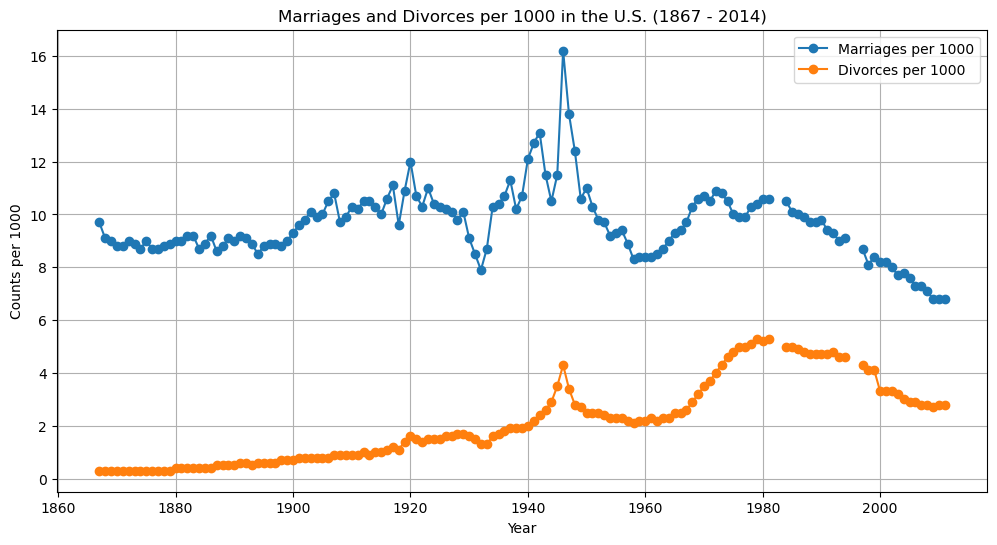

In [53]:
plt.figure(figsize=(12, 6))  
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', marker='o') 
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', marker='o')

plt.title('Marriages and Divorces per 1000 in the U.S. (1867 - 2014)')
plt.xlabel('Year')
plt.ylabel('Counts per 1000')

plt.legend()

plt.grid(True)

plt.show()

<h1><font color='#004b87'>Question 7</font></h1>
<p>Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!</p>

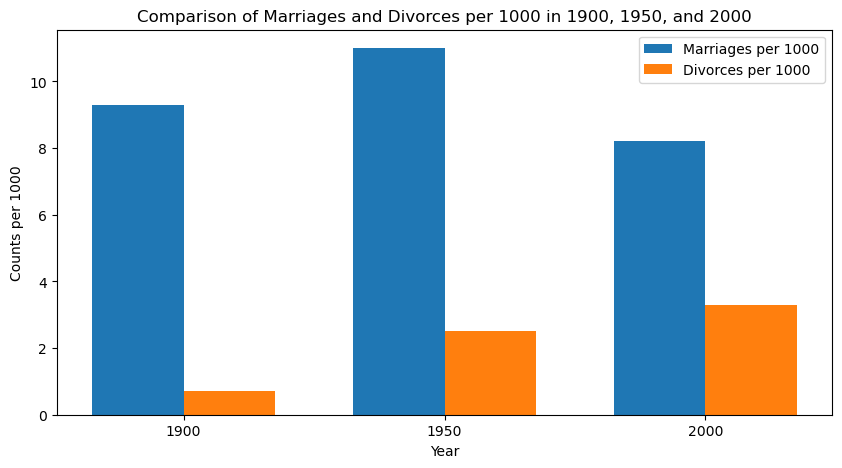

In [54]:
file_path = './us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)
selected_years = data[data['Year'].isin([1900, 1950, 2000])]

plt.figure(figsize=(10, 5))
bar_width = 0.35
index = range(len(selected_years['Year']))

plt.bar(index, selected_years['Marriages_per_1000'], bar_width, label='Marriages per 1000')
plt.bar([p + bar_width for p in index], selected_years['Divorces_per_1000'], bar_width, label='Divorces per 1000')


plt.xlabel('Year')
plt.ylabel('Counts per 1000')
plt.title('Comparison of Marriages and Divorces per 1000 in 1900, 1950, and 2000')
plt.xticks([p + bar_width / 2 for p in index], selected_years['Year'])

plt.legend()

plt.show()

<h1><font color='#004b87'>Question 8</font></h1>
<p>Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!</p>

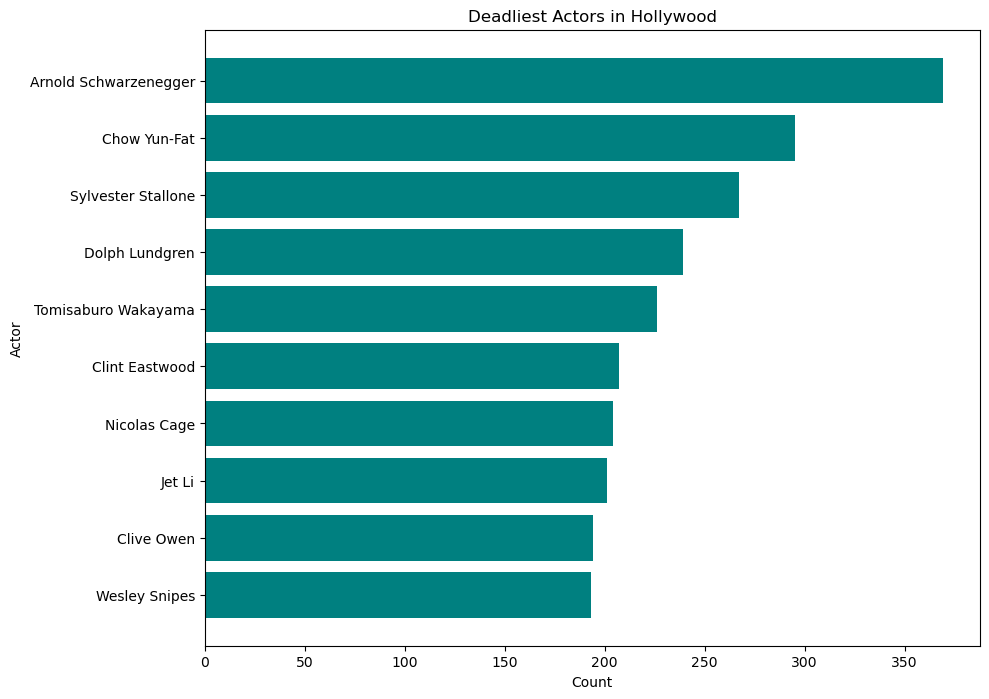

In [62]:
file_path = './actor_kill_counts.csv'
data = pd.read_csv(file_path)

data_sorted = data.sort_values('Count', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(data_sorted['Actor'], data_sorted['Count'], color='teal')

plt.xlabel('Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

plt.show()

<h1><font color='#004b87'>Question 9</font></h1>
<p>Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.</p>

In [56]:
file_path = './roman-emperor-reigns.csv'
emperors = pd.read_csv(file_path)

print(emperors.head())

    Emperor  Length_of_Reign         Cause_of_Death
0  Augustus            40.58  Possibly assassinated
1  Tiberius            22.50  Possibly assassinated
2  Caligula             4.83           Assassinated
3  Claudius            13.75  Possibly assassinated
4      Nero            13.67                Suicide


In [57]:
print(emperors['Cause_of_Death'].unique())

['Possibly assassinated' 'Assassinated' 'Suicide' 'Natural causes'
 'Illness' 'Executed' 'Killed in battle' 'Died in captivity']


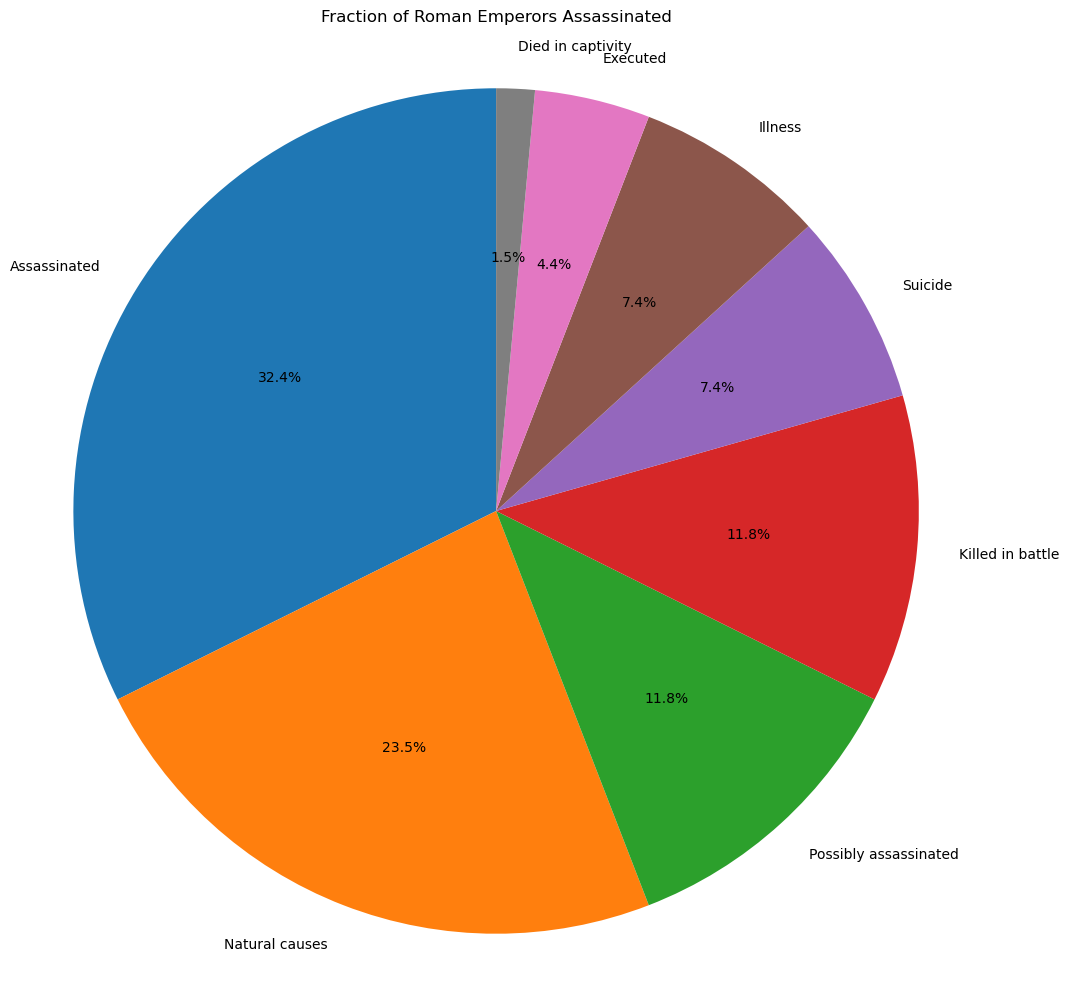

In [58]:
assassination_counts = emperors['Cause_of_Death'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(assassination_counts, labels=assassination_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Fraction of Roman Emperors Assassinated', pad=20)

plt.show()

<h1><font color='#004b87'>Question 10</font></h1>
<p>Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.</p>

   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  


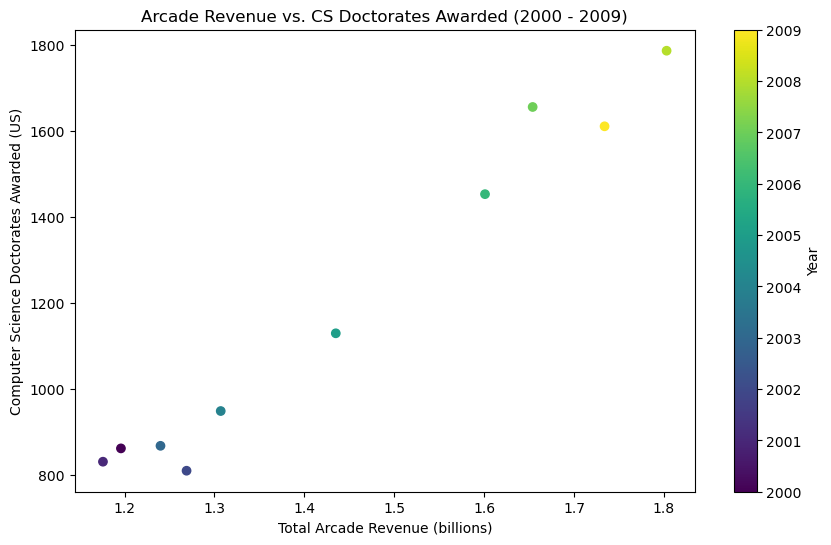

In [59]:
data = pd.read_csv('./arcade-revenue-vs-cs-doctorates.csv')

print(data.head())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Total Arcade Revenue (billions)'],
                      data['Computer Science Doctorates Awarded (US)'],
                      c=data['Year'],
                      cmap='viridis')

plt.title('Arcade Revenue vs. CS Doctorates Awarded (2000 - 2009)')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

cbar = plt.colorbar(scatter)
cbar.set_label('Year')

plt.show()